In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from pylab import rcParams
from matplotlib import pyplot as plt

In [2]:
# input
train = './data/course_project_train.csv'
test = './data/course_project_test.csv'

In [3]:
df = pd.read_csv(train)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


df.iloc[0]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

for colum in df.select_dtypes(include='object').columns:
    print(str(colum) + '\n\n' + str(df[colum].value_counts()) + '\n' + '*' * 100 + '\n')

len(df) - df.count()

In [5]:
df.loc[ (df['Current Loan Amount'] != 99999999.0)& (df['Annual Income'].isnull()==False)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1
11,Home Mortgage,1828560.0,4 years,0.0,12.0,17.6,839080.0,0.0,NaN,0.0,debt consolidation,Short Term,441100.0,402914.0,15528.0,737.0,0
12,Home Mortgage,933432.0,10+ years,0.0,8.0,14.0,443608.0,0.0,NaN,0.0,debt consolidation,Short Term,337766.0,315305.0,19446.0,706.0,0
13,Rent,2066364.0,10+ years,0.0,11.0,17.7,1654026.0,0.0,NaN,0.0,debt consolidation,Long Term,549780.0,1037077.0,21869.0,728.0,1
14,Own Home,2258796.0,7 years,0.0,11.0,17.7,1602546.0,0.0,NaN,0.0,other,Short Term,185262.0,1374327.0,58352.0,748.0,0
15,Rent,848464.0,10+ years,0.0,9.0,18.4,296186.0,0.0,NaN,0.0,debt consolidation,Short Term,145134.0,41439.0,12939.0,727.0,0
17,Home Mortgage,3361898.0,3 years,0.0,14.0,28.5,1042096.0,0.0,NaN,0.0,debt consolidation,Long Term,498872.0,689396.0,52249.0,644.0,1


In [6]:
df.loc[ df['Credit Score'] > 850, 'Credit Score'] = df['Credit Score']/10

In [7]:
df['Debt-to-income ratio'] = df['Monthly Debt']/(df['Annual Income']/12)*100

In [8]:
conditions = [
    (df['Credit Score'] <= 850 ) & (df['Credit Score'] > 719),
    (df['Credit Score'] <= 719 ) & (df['Credit Score'] > 689),
    (df['Credit Score'] <= 689 ) & (df['Credit Score'] > 629),
    (df['Credit Score'] <= 629 ) & (df['Credit Score'] >=300)]
choices = [0, 1, 2, 4]
df['Credit score ranges'] = np.select(conditions, choices, default = np.nan)

In [9]:
df['test 1'] = df['Current Loan Amount']/(df['Monthly Debt'])

In [10]:
df['long Credit History'] = (df['Years of Credit History'] > 10 ).astype(int)

In [11]:
df['DTI'] = (df['Debt-to-income ratio'] > 28 ).astype(int)

In [12]:
df['Credit Utilization Ratio'] = df['Current Loan Amount'] / (df['Current Credit Balance'])

In [13]:
df.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Debt-to-income ratio                       19.6993
Credit score ranges                              0
test 1                         

In [14]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Debt-to-income ratio,Credit score ranges,test 1,long Credit History,DTI,Credit Utilization Ratio
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000,5943.000000,5943.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,720.086993,0.281733,17.136302,0.529699,inf,0.913333,0.080933,inf
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,27.957233,0.449874,7.925588,0.813107,NaN,0.281365,0.272751,NaN
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,0.000000,0.000000,0.519921,0.000000,0.000000,0.023027
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,708.000000,0.000000,11.199956,0.000000,11.968861,1.000000,0.000000,0.886870
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,729.000000,0.000000,16.700531,0.000000,19.217610,1.000000,0.000000,1.385570
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,740.000000,1.000000,22.700269,1.000000,34.056888,1.000000,0.000000,2.896154
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,751.000000,1.000000,39.900901,4.000000,inf,1.000000,1.000000,inf


In [15]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()

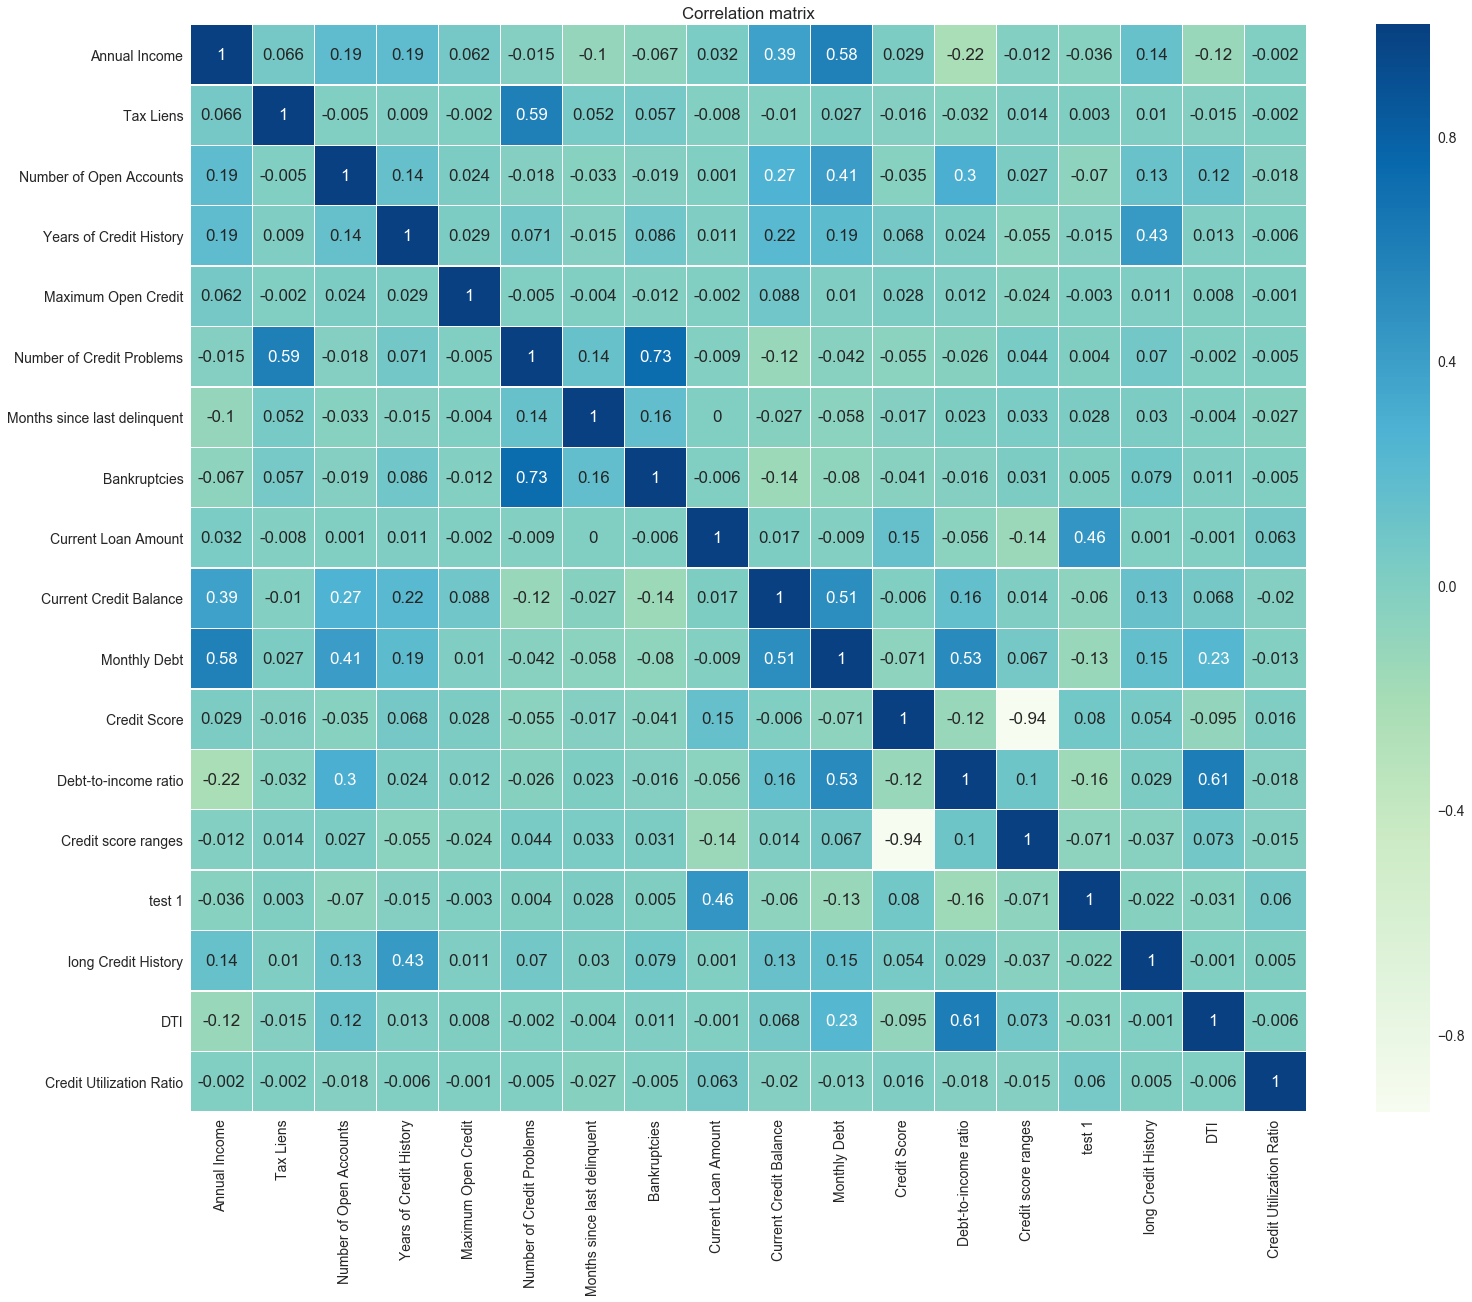

In [16]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

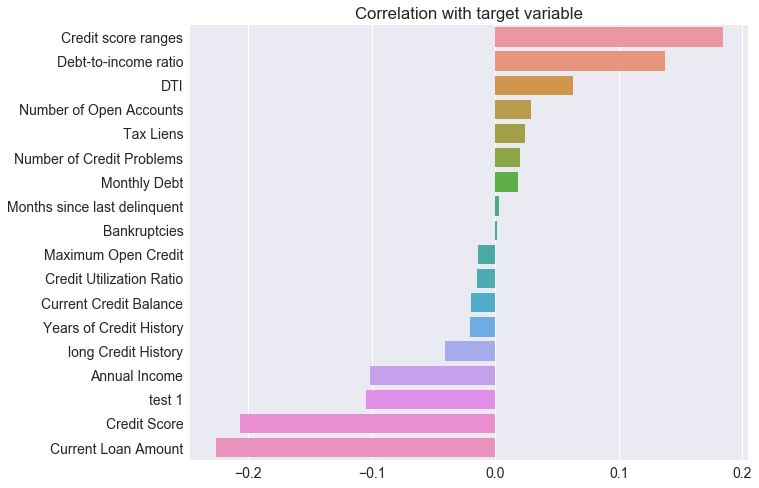

In [17]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

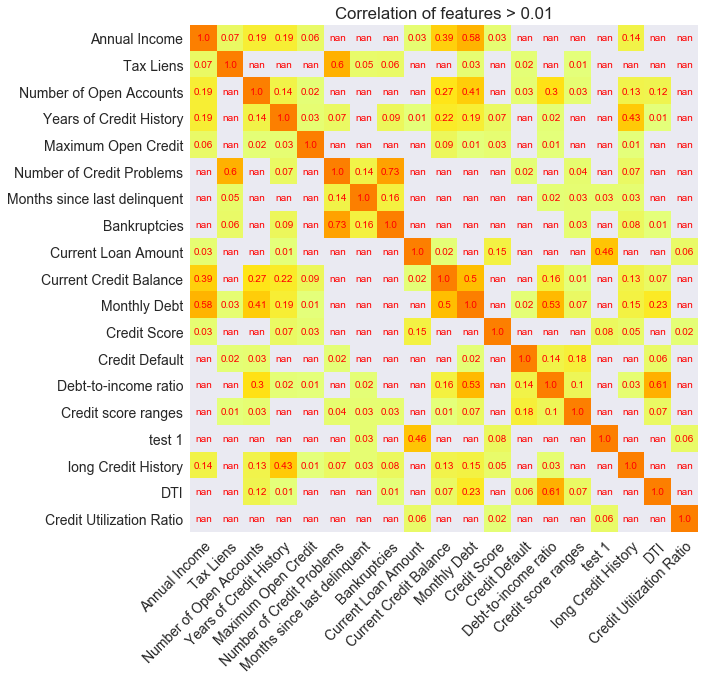

In [18]:
data_columns = df.columns
correlation = df.corr()
# прорисовываем температурную карту (heatmap) по перекрессной корреляции показателей
# для определения наиболее взаимозависимых показателей

# Размер графика
rcParams['figure.figsize'] = 10, 10
# Задаем отсекающий коэффициент корреляции. Ниже этого коэфф. считаем, что корреляция пары показателей не сильная.
correlation_rate_filter = 0.01

#Определяем колонки, столбцы и данные для построение heatmap
hm_index = correlation.index
hm_colums = correlation.columns
hm_data = np.array(correlation.where(correlation > abs(correlation_rate_filter))).round(2)


fig, ax = plt.subplots()
im = ax.imshow(hm_data, cmap="Wistia")

# Столбцы и индексы
ax.set_xticks(np.arange(len(hm_colums)))
ax.set_yticks(np.arange(len(hm_index)))
ax.set_xticklabels(hm_colums)
ax.set_yticklabels(hm_index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Подписи к столбцам и индексам.
for i in range(len(hm_index)):
    for j in range(len(hm_colums)):
        text = ax.text(j, i, hm_data[i, j],
                       ha="center", va="center", color="r", fontsize=10)

ax.set_title(f"Correlation of features > {correlation_rate_filter}")
fig.tight_layout()
plt.grid()
plt.show()